In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import model_from_json, load_model
from mtcnn.mtcnn import MTCNN
from pathlib import Path as path
import json
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects
import pdb ### Python debuger
import os ### Navigate Through Dirrectory
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
import cv2

In [2]:
tf.enable_eager_execution()

In [3]:
def crop_face(img, bb):
    x1, y1, width, height = bb
    x1,y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 +height
    return img[y1:y2, x1:x2]

def extract_feature( feature_extractor, img, bb):
    insz = feature_extractor.input_shape
    img = crop_face(img, bb)
    img = resize(img,(insz[1],insz[2]))
    img = normalize(img).reshape((1, insz[1],insz[2], insz[3]))
    image_feature = feature_extractor.predict(img)
    return image_feature

def resize(img, size):
    tmp1 = tf.image.resize_images(img, size)
    return tmp1.numpy().reshape((size[0], size[1],tmp.shape[-1]))

def normalize(img):
    return img/255

def show_img(img, figsize=None, ax=None):
    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

### Outline
def outline(ax, lw):
    """
    Outline the passed object with a black border
    """
    ax.set_path_effects([patheffects.Stroke(linewidth =lw , foreground = 'black'), patheffects.Normal()])
###Outline
def draw_bb(ax, b):
    """
    Draws a bounding box around the object 
    """
    patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor = 'white', lw = 2))
    outline(patch, 4)
    
def write_txt(ax, xy, txt, sz = 14):
    """
    writes text on  th image
    """
    text = ax.text(xy[0], xy[1], txt, verticalalignment = 'top', color = 'white',fontsize = sz, weight = 'bold')
    outline(text, 1)

def showImgWithAnn(image, annotations):
    """
    Displays the image with the bounding box or boxes
    args: 
        image: image in numpy format
        annotaions: List of tuples containing bounding boxes info and category id
    """
    a= show_img(img)
    for b, c in annotations:
        b = bb_hw(b)
        draw_bb(a, b)
        write_txt(a, b[:2], categ[c])
def detect_faces(img):
    detector = MTCNN()
    results = detector.detect_faces(img)
    bb_lst =[]
    for i in results:
        bb_lst.append(i["box"])
    return bb_lst

In [4]:
os.listdir("Models/FaceNet")

['facenet_keras.h5', 'facenet_keras_weights.h5']

In [5]:
model = load_model("Models/FaceNet/facenet_keras.h5")

W0705 12:22:58.711455 18084 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


In [6]:
print("Input info!")
print(model.inputs)
print(model.input_shape)
print()
print("Output info!")
print(model.outputs)
print(model.output_shape)
#print(model.outputs)

Input info!
[<tf.Tensor 'input_1:0' shape=(?, 160, 160, 3) dtype=float32>]
(None, 160, 160, 3)

Output info!
[<tf.Tensor 'Bottleneck_BatchNorm/Identity:0' shape=(?, 128) dtype=float32>]
(None, 128)


In [8]:
### Test image
img = plt.imread("pics/t.jpg")
bb_lst = detect_faces(img)
print("The number of Faces detected are ",len(bb_lst))

The number of Faces detected are  2


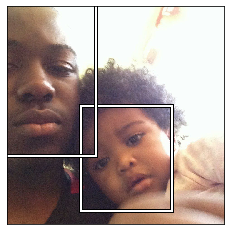

In [9]:
a = show_img(img)
draw_bb(a, bb_lst[0])
draw_bb(a, bb_lst[1])

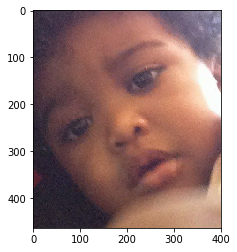

In [10]:
tmp = crop_face( img, bb_lst[0])
plt.imshow(tmp)
plt.show()

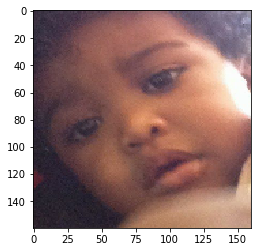

In [18]:
plt.imshow(normalize(resize(tmp, (160,160))))
plt.show()

In [26]:
model = load_model("Models/FaceNet/facenet_keras.h5")
features = extract_feature(model, img, bb_lst[0] )

W0705 13:52:41.041509 18084 hdf5_format.py:221] No training configuration found in save file: the model was *not* compiled. Compile it manually.


In [24]:
np.save("t_feat.npy", features)